# Training MLP Model

In [1]:
# In your backtesting.ipynb notebook cell
from pathlib import Path
import sys
import os
import yaml
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

ROOT_DIR = Path.cwd().parent
sys.path.append(str(ROOT_DIR))
sys.path.append(str(ROOT_DIR / "src"))

from backtest.backtest import run_backtest
from backtest.evaluation import evaluate_portfolio, plot_performance
from data.fetch_data import get_db_engine, fetch_stock_data_with_features
from trading.portfolio import evaluate_portfolio_returns

# Load environment variables from .env
load_dotenv(ROOT_DIR / ".env")

# Fetch sensitive credentials from .env file
server = os.getenv("DB_SERVER")
username = os.getenv("DB_USERNAME")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# Create your database engine (provide your actual credentials)
engine = get_db_engine(server,username,password,database)

# Load YAML configuration (adjust path if necessary)
with open(ROOT_DIR / "src" / "config" / "config.yaml", "r") as f:
    config = yaml.safe_load(f)
print(config)

2025-04-12 12:39:02.383026: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 12:39:02.424640: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:root:Database connection established successfully.


{'default': {'data': {'overall_date_range': {'start': '2010-01', 'end': '2010-04'}, 'rolling_window': {'train_window_months': 1, 'test_offset': 1}}, 'features': {'base': ['mom1m', 'mom6m', 'mom12m', 'retvol', 'bm', 'siccd']}, 'preprocessing_pipeline': ['drop_na', 'quantile_transform', 'encode_industry', 'drop_na'], 'model': {'name': 'mlpk', 'params': {'hidden_layer_sizes': [[8, 4]], 'activation': ['relu'], 'solver': ['adam'], 'max_iter': [500]}}}, 'experiment_2': {'data': {'overall_date_range': {'start': '2010-01', 'end': '2010-12'}, 'rolling_window': {'train_window_months': 1, 'test_offset': 1}}, 'features': {'base': ['mom36m', 'realestate', 'indmom', 'roeq', 'agr', 'siccd']}, 'preprocessing_pipeline': ['drop_na', 'encode_industry', 'quantile_transform'], 'model': {'name': 'mlpk', 'params': {'hidden_layer_sizes': [[64, 32, 16]], 'activation': ['relu'], 'solver': ['adam'], 'max_iter': [2000], 'alpha': [0.001], 'learning_rate_init': [0.001]}}}}


## Experiment 1

INFO:root:Constructed query: SELECT ticker, date, ret, mom1m, mom6m, mom12m, retvol, bm, siccd FROM data WHERE date BETWEEN '2010-01' AND '2010-04'
INFO:root:Fetched 15178 rows from database.
INFO:root:Data fetched with date configuration: {'overall_date_range': {'start': '2010-01', 'end': '2010-04'}, 'rolling_window': {'train_window_months': 1, 'test_offset': 1}}
INFO:root:Pooled data from months: ['2010-01'] with 3829 common tickers.
INFO:root:Starting preprocessing pipeline.


Date settings: {'overall_date_range': {'start': '2010-01', 'end': '2010-04'}, 'rolling_window': {'train_window_months': 1, 'test_offset': 1}}
  ticker     date       ret     mom1m     mom6m    mom12m    retvol        bm  \
0   EGAS  2010-01 -0.018932  0.162621  0.062002 -0.083704  0.038978  0.847542   
1   BTFG  2010-01  0.365854  0.036101 -0.070470 -0.810957  0.017489  0.940487   
2   AEPI  2010-01 -0.088036  0.012966  0.431982  1.149602  0.022376  0.303866   
3   JJSF  2010-01  0.046296  0.109903  0.007841  0.013983  0.013309  0.498279   
4   DGSE  2010-01 -0.028369  0.029197  0.245455 -0.194118  0.047844  0.753448   

   siccd  
0   4925  
1   6020  
2   3081  
3   2052  
4   5094  


INFO:root:Data preprocessing completed successfully.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


INFO:root:Tested params {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500} => val R2: 0.1314
INFO:root:Best hyperparameters: {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500}, validation R2: 0.1314
INFO:root:Model saved as: /home/austin-lipe/GdriveOffline/Stock Prediction Project/stock-prediction-project/data/models/mlpk_2025-04-12_r2_0.1314.h5


117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


INFO:root:Starting preprocessing pipeline.
INFO:root:Data preprocessing completed successfully.


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step


INFO:root:Backtest for test month 2010-02: Train R2 = 0.1769, Test R2 = -0.2868
INFO:root:Pooled data from months: ['2010-02'] with 3807 common tickers.
INFO:root:Starting preprocessing pipeline.
INFO:root:Data preprocessing completed successfully.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


INFO:root:Tested params {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500} => val R2: 0.0055
INFO:root:Best hyperparameters: {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500}, validation R2: 0.0055
INFO:root:Model saved as: /home/austin-lipe/GdriveOffline/Stock Prediction Project/stock-prediction-project/data/models/mlpk_2025-04-12_r2_0.0055.h5


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


INFO:root:Starting preprocessing pipeline.
INFO:root:Data preprocessing completed successfully.


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


INFO:root:Backtest for test month 2010-03: Train R2 = 0.0456, Test R2 = -0.0489
INFO:root:Pooled data from months: ['2010-03'] with 3785 common tickers.
INFO:root:Starting preprocessing pipeline.
INFO:root:Data preprocessing completed successfully.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


INFO:root:Tested params {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500} => val R2: -0.0172
INFO:root:Best hyperparameters: {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500}, validation R2: -0.0172
INFO:root:Model saved as: /home/austin-lipe/GdriveOffline/Stock Prediction Project/stock-prediction-project/data/models/mlpk_2025-04-12_r2_-0.0172.h5


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


INFO:root:Starting preprocessing pipeline.
INFO:root:Data preprocessing completed successfully.


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


INFO:root:Backtest for test month 2010-04: Train R2 = 0.0297, Test R2 = -0.0134
INFO:root:Pooled data from months: ['2010-04'] with 3757 common tickers.
INFO:root:Starting preprocessing pipeline.
INFO:root:Data preprocessing completed successfully.


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


INFO:root:Tested params {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500} => val R2: 0.0485
INFO:root:Best hyperparameters: {'hidden_layer_sizes': [8, 4], 'activation': 'relu', 'solver': 'adam', 'max_iter': 500}, validation R2: 0.0485
INFO:root:Model saved as: /home/austin-lipe/GdriveOffline/Stock Prediction Project/stock-prediction-project/data/models/mlpk_2025-04-12_r2_0.0485.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


INFO:root:Constructed portfolio with 150 long and 50 short positions.
INFO:root:Constructed portfolio with 150 long and 50 short positions.
INFO:root:Constructed portfolio with 150 long and 50 short positions.


Accumulation (cumulative returns): 0.9582407456273689
Maximum Drawdown: -0.025032945312559618
Mean Return: -0.012685967910931328
Standard Deviation: 0.06547944965806475
Sharpe Ratio: -0.6711339536194529


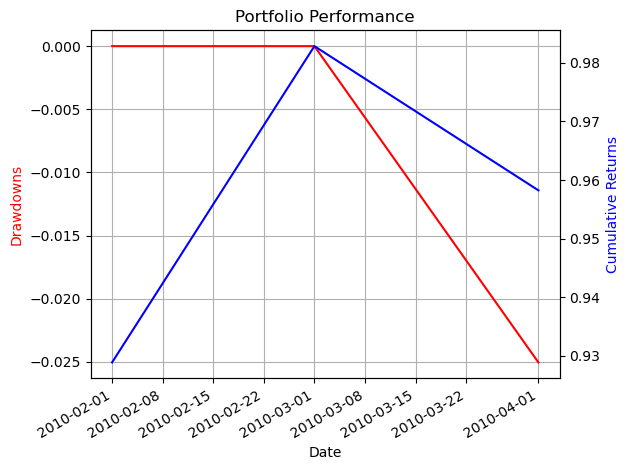

In [2]:
experiment = 'default'

date_config = config[experiment]["data"]

# Extract features and date settings from the "default" configuration
model_name = config[experiment]['model']['name']
features = config[experiment]["features"]["base"]
train_window_months = date_config['rolling_window']['train_window_months']
start_month = date_config['overall_date_range']['start']
end_month = date_config['overall_date_range']['end']
param_grid = config[experiment]['model']['params']
preprocessing_pipeline = config[experiment]['preprocessing_pipeline']

# Fetch the data with the provided features and date configuration
df, dates = fetch_stock_data_with_features(engine, features, date_config, table_name="data")

print("Date settings:", dates)
print(df.head())


# Run backtest
results_df = run_backtest(df, model_name, features, train_window_months, start_month, end_month, param_grid, preprocessing_pipeline)

# examine results
monthly_ret = evaluate_portfolio_returns(results_df)

metrics = evaluate_portfolio(monthly_ret)
cumulative_returns = metrics["cumulative_returns"]
drawdowns = metrics["drawdowns"]

print("Accumulation (cumulative returns):", cumulative_returns.tail(1).values[0])
print("Maximum Drawdown:", drawdowns.min())
print("Mean Return:", metrics["mean_return"])
print("Standard Deviation:", metrics["std_dev"])
print("Sharpe Ratio:", metrics["sharpe_ratio"])

plot_performance(monthly_ret)

## Experiment 2

In [2]:
experiment = 'experiment_1'

date_config = config[experiment]["data"]

# Extract features and date settings from the "default" configuration
model_name = config[experiment]['model']['name']
features = config[experiment]["features"]["base"]
train_window_months = date_config['rolling_window']['train_window_months']
start_month = date_config['overall_date_range']['start']
end_month = date_config['overall_date_range']['end']
param_grid = config[experiment]['model']['params']
preprocessing_pipeline = config[experiment]['preprocessing_pipeline']

# Fetch the data with the provided features and date configuration
df, dates = fetch_stock_data_with_features(engine, features, date_config, table_name="data")

print("Date settings:", dates)
print(df.head())


# Run backtest
results_df = run_backtest(df, model_name, features, train_window_months, start_month, end_month, param_grid, preprocessing_pipeline)

# contruct portfolio
monthly_ret = evaluate_portfolio_returns(results_df)

# evaluate returns
metrics = evaluate_portfolio(monthly_ret)
cumulative_returns = metrics["cumulative_returns"]
drawdowns = metrics["drawdowns"]

print("Accumulation (cumulative returns):", cumulative_returns.tail(1).values[0])
print("Maximum Drawdown:", drawdowns.min())
print("Mean Return:", metrics["mean_return"])
print("Standard Deviation:", metrics["std_dev"])
print("Sharpe Ratio:", metrics["sharpe_ratio"])

plot_performance(monthly_ret)

NameError: name 'config' is not defined